In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np


In [13]:
def file_reader(fname):
    f = open(fname)
    data = json.load(f)
    last_token_sim = np.array(data)
    print(last_token_sim.shape)
    f.close()
    return last_token_sim

# model_name = "meta-llama/Llama-2-70b-hf"
# model_name = "mistralai/Mistral-7B-v0.1"
model_name = "Qwen/Qwen-72B"

# file_dir = "data/"
# fname = file_dir+ f"c4_{model_name.split('/')[-1]}_2.json"
# last_token_sim =  file_reader(fname)

# step = 2
# fname = file_dir+ f"c4_{model_name.split('/')[-1]}_s_{step}.json"
# last_token_sim_step =  file_reader(fname)



Averaged over 12848


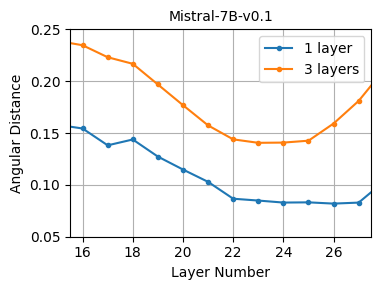

In [4]:
num_layers = last_token_sim.shape[0]
num_examples = last_token_sim.shape[1]
print(f"Averaged over {num_examples}")
plt.figure(figsize=(4,3))
# plt.plot(np.arange(num_layers), last_token_sim)
plt.plot(np.arange(num_layers), np.arccos(last_token_sim).mean(axis=1)/np.pi,".-",label="1 layer")
plt.plot(np.arange(num_layers-step+1), np.arccos(last_token_sim_step).mean(axis=1)/np.pi,".-",label="3 layers")
plt.xlabel("Layer Number")# (similarity btw in and out of [x,x+1,x+2])")
plt.ylabel("Angular Distance")
plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
plt.grid()
plt.xlim(15.5,27.5)
plt.ylim(0.05,0.25)
plt.legend()
plt.tight_layout()
# plt.savefig(f"c4_{model_name.split('/')[-1]}.png")
plt.show()

In [15]:
model_name = "mistralai/Mistral-7B-v0.1"

file_dir = "data/"
out_dir = "avg_data/"

num_layers = 32
step_list = np.arange(1,25)
colors = plt.cm.viridis(np.linspace(0,1,1+len(step_list)))
x_min = []
y_min = []
cos_sim_mean = []
plt.figure()#figsize=(5,2))
for step in step_list:
    if step==1:
        fname = file_dir+ f"c4_{model_name.split('/')[-1]}_2.json"
    else:
        fname = file_dir+ f"c4_{model_name.split('/')[-1]}_s_{step}.json"
    last_token_sim_step =  file_reader(fname)
    x = np.arange(num_layers-step+1)
    y =  np.arccos(last_token_sim_step).mean(axis=1)/np.pi
    cos_sim_mean.append(y.tolist())
    idx_min = np.argmin(y)
    x_min.append(x[idx_min])
    y_min.append(y[idx_min])
    plt.plot(x, y,".-", markersize=3,linewidth=1.5,color=colors[step],label=f"{step}")
    # plt.plot(x, y,".-", markersize=3,linewidth=1.5,label=f"{step}")

plt.plot(x_min,y_min,"kx-",markersize=4,alpha=0.5)
plt.xlabel("Layer Number")# (similarity btw in and out of [x,x+1,x+2])")
plt.ylabel("Angular Distance")
plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
# plt.grid()
# plt.xlim(15.5,27.5)
# plt.ylim(0.05,0.25)
# plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
# plt.savefig(f"c4_{model_name.split('/')[-1]}.png")
plt.show()

print(len(cos_sim_mean))
fname = out_dir+ f"avg_c4_{model_name.split('/')[-1]}.json"
with open(fname, 'w') as f:
    json.dump(cos_sim_mean, f)


FileNotFoundError: [Errno 2] No such file or directory: 'data/c4_Qwen-72B_s_1.json'

<Figure size 640x480 with 0 Axes>

In [42]:
print(x_min)

[26, 24, 23, 23, 23, 22, 21, 21, 20, 20, 19, 17, 17, 16, 13, 13, 11, 8, 8, 6, 6, 5, 4, 3]


## efficient

2288


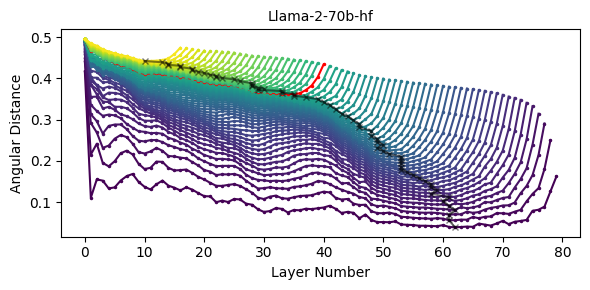

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def file_reader(fname):
    f = open(fname)
    last_token_sim = json.load(f)
    # last_token_sim = np.array(data)
    # print(last_token_sim.shape)
    f.close()
    return last_token_sim

model_name = "meta-llama/Llama-2-70b-hf"
# model_name = "mistralai/Mistral-7B-v0.1"
# model_name = "Qwen/Qwen-72B"

out_dir = "data/"
num_layers = 80
# step_list = np.arange(1,0.8*num_layers+1).astype(int)
step_list = np.arange(1,65)
colors = plt.cm.viridis(np.linspace(0,1,1+len(step_list)))
x_min = []
y_min = []

fname = out_dir+ f"c4_{model_name.split('/')[-1]}_steps.json"
# fname = out_dir+ f"mmlu_{model_name.split('/')[-1]}_steps.json"

similarity =  file_reader(fname)
print(len(similarity["1"]))

# plt.figure(figsize=(5,4))
plt.figure(figsize=(6,3))
for idx, step in enumerate(step_list):
# for idx, step in enumerate([1]):
    x = np.arange(num_layers-step+1)
    y =  np.arccos(np.array(similarity[f"{step}"])).mean(axis=0)/np.pi
    idx_min = np.argmin(y)
    x_min.append(x[idx_min])
    y_min.append(y[idx_min])
    # id0 = int(len(y)/2)
    # id0 = 9
    # idx_min = np.argmin(y[id0:])
    # x_min.append(x[id0+idx_min])
    # y_min.append(y[id0+idx_min])

    if step == num_layers//2:
        plt.plot(x, y,"r.-", markersize=3,linewidth=1.5,label=f"{step}")
    else:
        plt.plot(x, y,".-", markersize=3,linewidth=1.5,color=colors[idx],label=f"{step}")
    # plt.plot(x, y,".-", markersize=3,linewidth=1.5,label=f"{step}")

plt.plot(x_min,y_min,"kx-",markersize=4,alpha=0.5)
plt.xlabel("Layer Number")# (similarity btw in and out of [x,x+1,x+2])")
plt.ylabel("Angular Distance")
plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
# plt.grid()
# plt.xlim(15.5,27.5)
# plt.ylim(0.05,0.25)
# plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
# plt.savefig("figures/"+f"c4_{model_name.split('/')[-1]}.pdf")
plt.show()

In [58]:
print(x_min)

[8, 30, 30, 30, 30, 31, 30, 30, 30, 30, 28, 28, 27, 27, 26, 27, 26, 26, 25, 25, 25, 24, 23, 22, 22, 21, 20, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2]


In [56]:
print(y[8], y[30], y[30]-y[8])


0.012117570913503233 0.012968714353479535 0.0008511434399763023


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def file_reader(fname):
    f = open(fname)
    last_token_sim = json.load(f)
    # last_token_sim = np.array(data)
    # print(last_token_sim.shape)
    f.close()
    return last_token_sim

# model_name = "/data/llama-hf/Llama-2-13b-hf"
model_name = "mistralai/Mistral-7B-v0.1"
out_dir = "data/"
num_layers = 32
# step_list = np.arange(1,0.8*num_layers+1).astype(int)
step_list = np.arange(1,25)
colors = plt.cm.viridis(np.linspace(0,1,1+len(step_list)))
x_min = []
y_mid = []

fname = out_dir+ f"c4_{model_name.split('/')[-1]}_steps.json"
# fname = out_dir+ f"mmlu_{model_name.split('/')[-1]}_steps.json"

similarity =  file_reader(fname)
print(len(similarity["1"]))

plt.figure()#figsize=(5,2))
for idx, step in enumerate(step_list):
    # y =  np.arccos(np.array(similarity[f"{step}"])).mean(axis=0)/np.pi
    y =  np.array(similarity[f"{step}"]).mean(axis=0)
    y_mid.append(y[-2]/y.mean())

plt.plot(step_list/num_layers,np.array(y_mid),".-")

plt.xlabel("Layer Number")# (similarity btw in and out of [x,x+1,x+2])")
plt.ylabel("Angular Distance")
plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
# plt.grid()
# plt.xlim(15.5,27.5)
# plt.ylim(0.05,0.25)
# plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
# plt.savefig(f"c4_{model_name.split('/')[-1]}.png")
plt.show()